In [416]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')

In [417]:
df=pd.read_excel('student_mat.xlsx')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [418]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [419]:
df.shape

(395, 33)

In [420]:
df.index

RangeIndex(start=0, stop=395, step=1)

In [421]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [423]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [424]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [425]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [426]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [427]:
print('before drop duplicates: ',df.shape)
df=df.drop_duplicates()
print('after drop duplicates: ',df.shape)

before drop duplicates:  (395, 33)
after drop duplicates:  (395, 33)


In [428]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 395 observations with 33 features.


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>],
       [<AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>,
        <AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>,
        <AxesSubplot:title={'center':'G3'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,

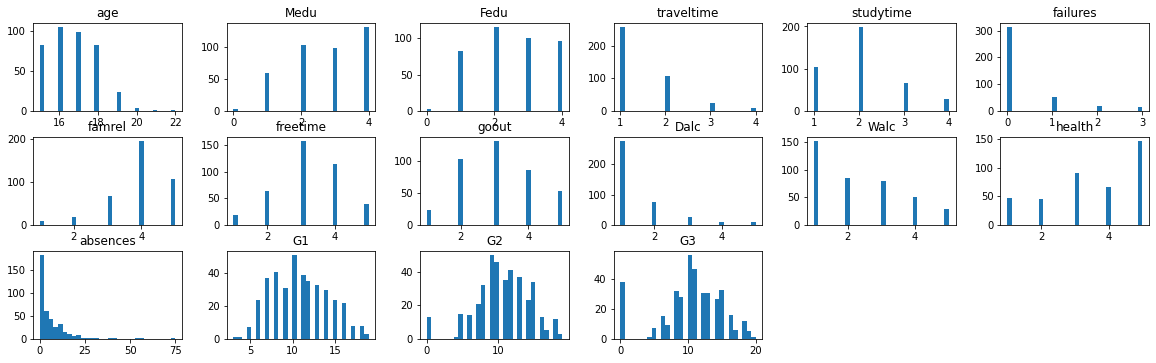

In [429]:
df.hist(figsize=(20,10), grid=False, layout=(5, 6), bins = 30)

In [430]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [431]:
numerical_features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [432]:
categorical_features

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [433]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
12,absences,3.657622
5,failures,2.377951
9,Dalc,2.182434
3,traveltime,1.600920
4,studytime,0.629739
10,Walc,0.609634
0,age,0.464498
13,G1,0.239699
8,goout,0.116060
2,Fedu,-0.031552


<AxesSubplot:xlabel='sex', ylabel='count'>

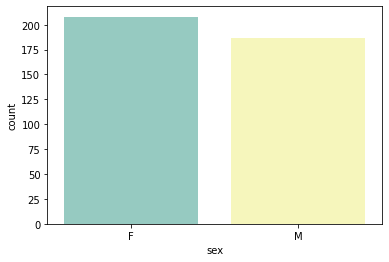

In [434]:
sns.countplot(x = 'sex', data = df, palette="Set3")

<AxesSubplot:xlabel='sex', ylabel='age'>

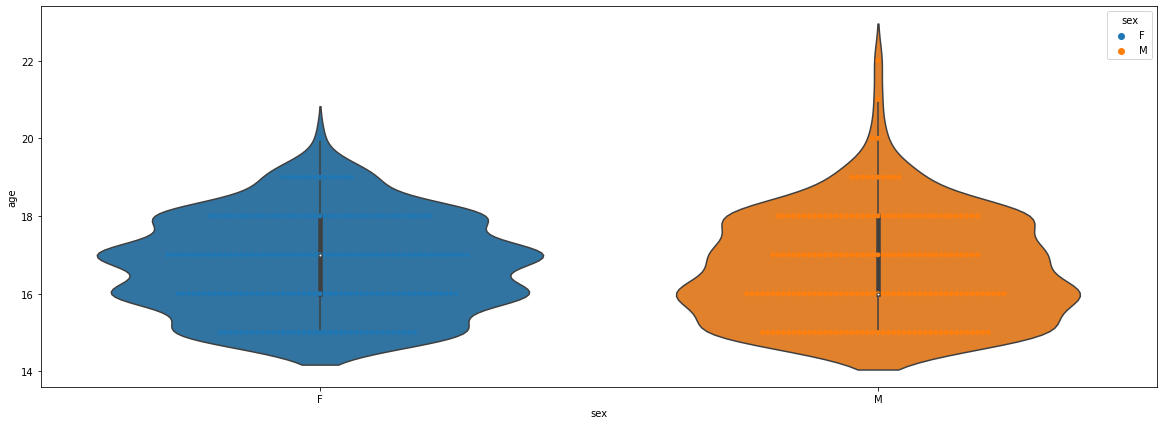

In [435]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'sex', y = 'age', data = df, hue = 'sex')
sns.violinplot(x = 'sex', y = 'age', data = df)

In [436]:
#df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
 #      'Viscera_weight', 'Shell_weight', 'age']].mean().sort_values('age')

In [437]:
df.sort_index(axis=1, ascending=False, inplace=True)
df.head(10)

,traveltime,studytime,sex,schoolsup,school,romantic,reason,paid,nursery,internet,...,Walc,Pstatus,Mjob,Medu,G3,G2,G1,Fjob,Fedu,Dalc
0,2,2,F,yes,GP,no,course,no,yes,no,...,1,A,at_home,4,6,6,5,teacher,4,1
1,1,2,F,no,GP,no,course,no,no,yes,...,1,T,at_home,1,6,5,5,other,1,1
2,1,2,F,yes,GP,no,other,yes,yes,yes,...,3,T,at_home,1,10,8,7,other,1,2
3,1,3,F,no,GP,yes,home,yes,yes,yes,...,1,T,health,4,15,14,15,services,2,1
4,1,2,F,no,GP,no,home,yes,yes,no,...,2,T,other,3,10,10,6,other,3,1
5,1,2,M,no,GP,no,reputation,yes,yes,yes,...,2,T,services,4,15,15,15,other,3,1
6,1,2,M,no,GP,no,home,no,yes,yes,...,1,T,other,2,11,12,12,other,2,1
7,2,2,F,yes,GP,no,home,no,yes,no,...,1,A,other,4,6,5,6,teacher,4,1
8,1,2,M,no,GP,no,home,yes,yes,yes,...,1,A,services,3,19,18,16,other,2,1
9,1,2,M,no,GP,no,home,yes,yes,yes,...,1,T,other,3,15,15,14,other,4,1


In [438]:
label_encoder= LabelEncoder()

In [439]:
df['school'].unique()

array(['GP', 'MS'], dtype=object)

In [440]:
df['school'] = label_encoder.fit_transform(df['school'])
df['school'].unique()

array([0, 1])

In [441]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [442]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df['sex'].unique()

array([0, 1])

In [443]:
df['address'].unique()

array(['U', 'R'], dtype=object)

In [444]:
df['address'] = label_encoder.fit_transform(df['address'])
df['address'].unique()

array([1, 0])

In [445]:
df['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

In [446]:
df['famsize'] = label_encoder.fit_transform(df['famsize'])
df['famsize'].unique()

array([0, 1])

In [447]:
df['Pstatus'].unique()

array(['A', 'T'], dtype=object)

In [448]:
df['Pstatus'] = label_encoder.fit_transform(df['Pstatus'])
df['Pstatus'].unique()

array([0, 1])

In [449]:
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [450]:
df['Mjob'] = label_encoder.fit_transform(df['Mjob'])
df['Mjob'].unique()

array([0, 1, 2, 3, 4])

In [451]:
df['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [452]:
df['Fjob'] = label_encoder.fit_transform(df['Fjob'])
df['Fjob'].unique()

array([4, 2, 3, 1, 0])

In [453]:
df['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [454]:
df['reason'] = label_encoder.fit_transform(df['reason'])
df['reason'].unique()

array([0, 2, 1, 3])

In [455]:
df['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [456]:
df['guardian'] = label_encoder.fit_transform(df['guardian'])
df['guardian'].unique()

array([1, 0, 2])

In [457]:
df['schoolsup'].unique()

array(['yes', 'no'], dtype=object)

In [458]:
df['schoolsup'] = label_encoder.fit_transform(df['schoolsup'])
df['schoolsup'].unique()

array([1, 0])

In [459]:
df['famsup'].unique()

array(['no', 'yes'], dtype=object)

In [460]:
df['famsup'] = label_encoder.fit_transform(df['famsup'])
df['famsup'].unique()

array([0, 1])

In [461]:
df['paid'].unique()

array(['no', 'yes'], dtype=object)

In [462]:
df['paid'] = label_encoder.fit_transform(df['paid'])
df['paid'].unique()

array([0, 1])

In [463]:
df['activities'].unique()

array(['no', 'yes'], dtype=object)

In [464]:
df['activities'] = label_encoder.fit_transform(df['activities'])
df['activities'].unique()

array([0, 1])

In [465]:
df['nursery'].unique()

array(['yes', 'no'], dtype=object)

In [466]:
df['nursery'] = label_encoder.fit_transform(df['nursery'])
df['nursery'].unique()

array([1, 0])

In [467]:
df['higher'].unique()

array(['yes', 'no'], dtype=object)

In [468]:
df['higher'] = label_encoder.fit_transform(df['higher'])
df['higher'].unique()

array([1, 0])

In [469]:
df['internet'].unique()

array(['no', 'yes'], dtype=object)

In [470]:
df['internet'] = label_encoder.fit_transform(df['internet'])
df['internet'].unique()

array([0, 1])

In [471]:
df['romantic'].unique()

array(['no', 'yes'], dtype=object)

In [472]:
df['romantic'] = label_encoder.fit_transform(df['romantic'])
df['romantic'].unique()

array([0, 1])

In [473]:
df['pass']=df.apply(lambda row: 1 if(row['G1']+row['G2']+row['G3'])>=35 else 0, axis=1)

In [474]:
df=df.drop(['G1','G2','G3'], axis=1)

In [475]:
print("student is failed:", len(df[df['pass']==0])/len(df))

student is failed: 0.579746835443038


In [476]:
print("student is passed:", len(df[df['pass']==1])/len(df))

student is passed: 0.42025316455696204


In [477]:
df.head(10)

,traveltime,studytime,sex,schoolsup,school,romantic,reason,paid,nursery,internet,...,activities,absences,Walc,Pstatus,Mjob,Medu,Fjob,Fedu,Dalc,pass
0,2,2,0,1,0,0,0,0,1,0,...,0,6,1,0,0,4,4,4,1,0
1,1,2,0,0,0,0,0,0,0,1,...,0,4,1,1,0,1,2,1,1,0
2,1,2,0,1,0,0,2,1,1,1,...,0,10,3,1,0,1,2,1,2,0
3,1,3,0,0,0,1,1,1,1,1,...,1,2,1,1,1,4,3,2,1,1
4,1,2,0,0,0,0,1,1,1,0,...,0,4,2,1,2,3,2,3,1,0
5,1,2,1,0,0,0,3,1,1,1,...,1,10,2,1,3,4,2,3,1,1
6,1,2,1,0,0,0,1,0,1,1,...,0,0,1,1,2,2,2,2,1,1
7,2,2,0,1,0,0,1,0,1,0,...,0,6,1,0,2,4,4,4,1,0
8,1,2,1,0,0,0,1,1,1,1,...,0,0,1,0,3,3,2,2,1,1
9,1,2,1,0,0,0,1,1,1,1,...,1,0,1,1,2,3,2,4,1,1


In [478]:
#sns.pairplot(df, diag_kind='kde')
#plt.show()

In [479]:
corr=df.corr()

<AxesSubplot:>

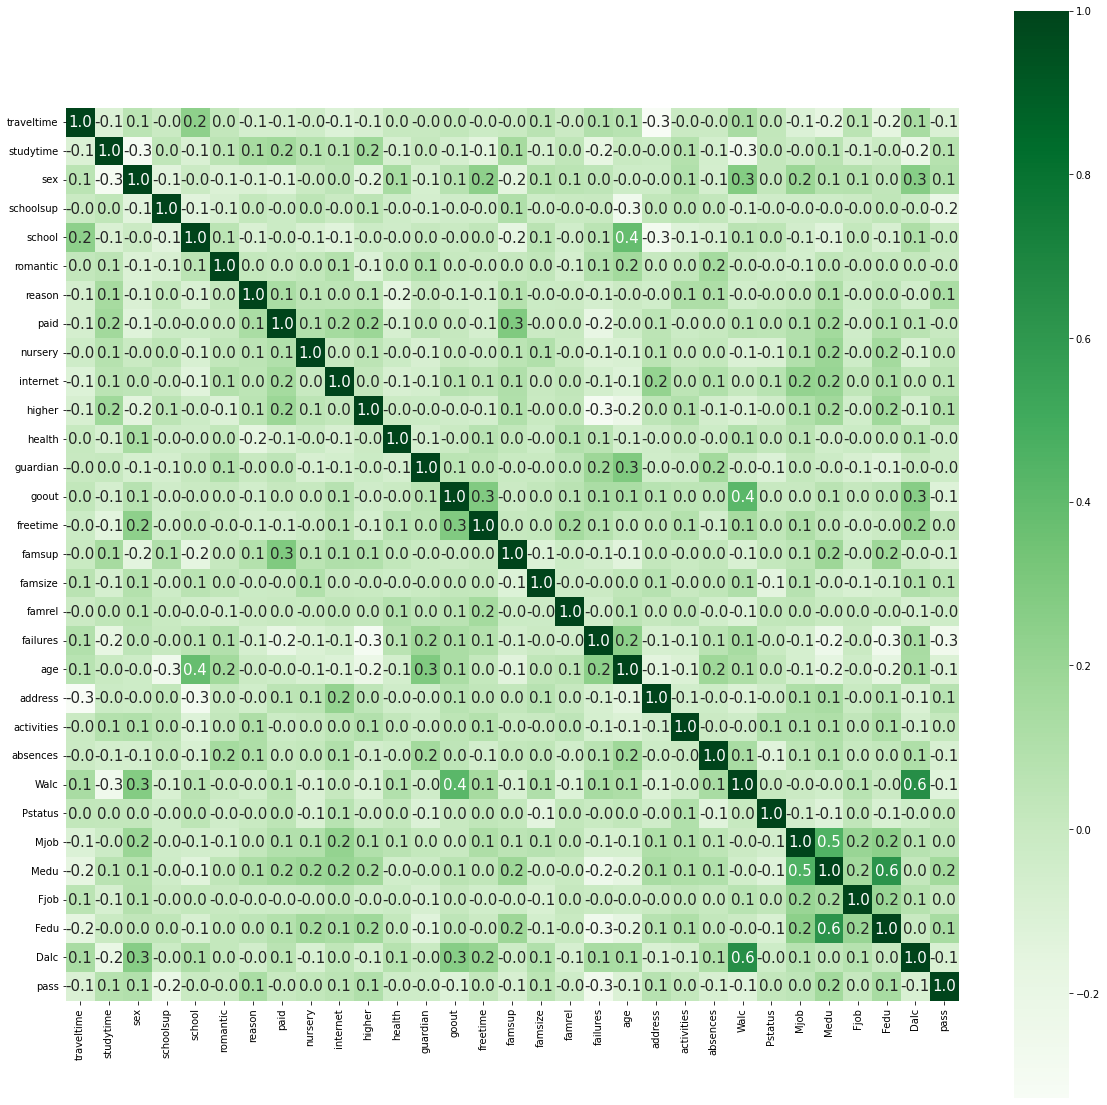

In [480]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

<AxesSubplot:>

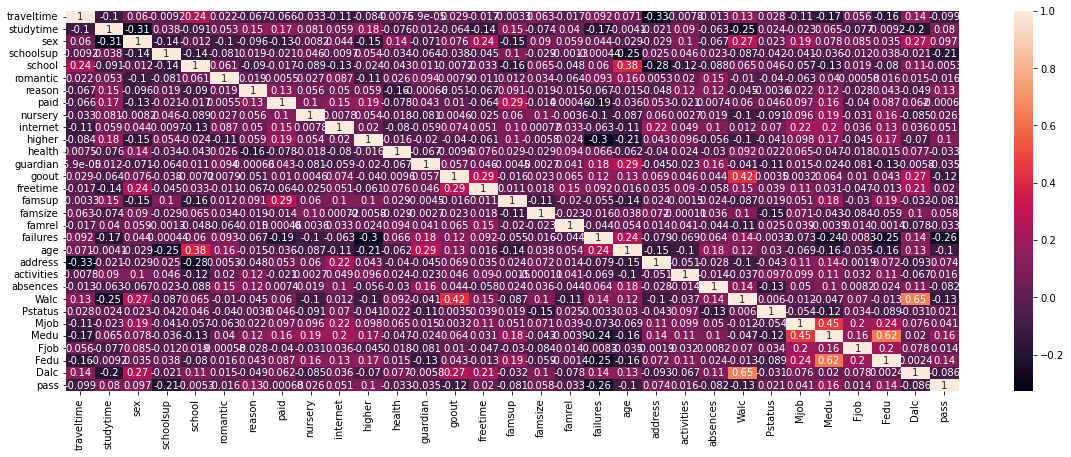

In [481]:
import seaborn as sb

plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

In [482]:
df.corr()

,traveltime,studytime,sex,schoolsup,school,romantic,reason,paid,nursery,internet,...,activities,absences,Walc,Pstatus,Mjob,Medu,Fjob,Fedu,Dalc,pass
traveltime,1.000000,-0.100909,0.059722,-0.009246,0.242308,0.021962,-0.067034,-0.066420,-0.033338,-0.111302,...,-0.007766,-0.012944,0.134116,0.028265,-0.109752,-0.171639,0.055878,-0.158194,0.138325,-0.098547
studytime,-0.100909,1.000000,-0.306268,0.037763,-0.090681,0.053285,0.146228,0.167220,0.081325,0.059422,...,0.089877,-0.062700,-0.253785,0.024294,-0.023097,0.064944,-0.076817,-0.009175,-0.196019,0.080262
sex,0.059722,-0.306268,1.000000,-0.138271,-0.012286,-0.102023,-0.095867,-0.129126,-0.008203,0.044113,...,0.099833,-0.066962,0.274194,0.023443,0.191421,0.078228,0.084957,0.034878,0.268171,0.096691
schoolsup,-0.009246,0.037763,-0.138271,1.000000,-0.139789,-0.080716,0.018516,-0.020753,0.045967,-0.009683,...,0.046032,0.022526,-0.087152,-0.042238,-0.040958,-0.036029,-0.011657,0.037530,-0.021485,-0.205462
school,0.242308,-0.090681,-0.012286,-0.139789,1.000000,0.060700,-0.090010,-0.017083,-0.089277,-0.133578,...,-0.116946,-0.088480,0.065087,0.045923,-0.056670,-0.133333,0.018974,-0.079807,0.114209,-0.005303
romantic,0.021962,0.053285,-0.102023,-0.080716,0.060700,1.000000,0.018894,0.005536,0.027495,0.087122,...,0.019651,0.153384,-0.010141,-0.040451,-0.062999,0.039681,-0.000583,0.015602,0.015121,-0.016021
reason,-0.067034,0.146228,-0.095867,0.018516,-0.090010,0.018894,1.000000,0.133559,0.055659,0.049916,...,0.115848,0.116909,-0.044699,-0.003553,0.022022,0.117653,-0.027688,0.043099,-0.048539,0.129868
paid,-0.066420,0.167220,-0.129126,-0.020753,-0.017083,0.005536,0.133559,1.000000,0.102143,0.153132,...,-0.021382,0.007435,0.060454,0.046435,0.096566,0.159700,-0.040435,0.086981,0.062465,-0.000678
nursery,-0.033338,0.081325,-0.008203,0.045967,-0.089277,0.027495,0.055659,0.102143,1.000000,0.007830,...,0.002731,0.019155,-0.099534,-0.090615,0.095848,0.193263,-0.030812,0.157177,-0.084849,0.025921
internet,-0.111302,0.059422,0.044113,-0.009683,-0.133578,0.087122,0.049916,0.153132,0.007830,1.000000,...,0.048663,0.101701,0.011687,0.070074,0.216969,0.201463,0.035777,0.127507,0.036210,0.051374


In [483]:
from scipy.stats import pearsonr,spearmanr
L=[]
for i in df.columns:
    pearsonCor,_=pearsonr(df[i],df['pass'])
    L.append(pearsonCor)
    print(i,' - pearsonCor={}'.format(pearsonCor))

traveltime  - pearsonCor=-0.09854706490938907
studytime  - pearsonCor=0.08026178128777012
sex  - pearsonCor=0.09669079465338819
schoolsup  - pearsonCor=-0.20546182960632192
school  - pearsonCor=-0.0053028321559562865
romantic  - pearsonCor=-0.016020879710162167
reason  - pearsonCor=0.12986767729683185
paid  - pearsonCor=-0.0006775719029151316
nursery  - pearsonCor=0.025921248953121482
internet  - pearsonCor=0.05137415072560352
higher  - pearsonCor=0.10304972363435264
health  - pearsonCor=-0.03337478847799626
guardian  - pearsonCor=-0.03469015492462842
goout  - pearsonCor=-0.1156497345804129
freetime  - pearsonCor=0.020135682799487006
famsup  - pearsonCor=-0.08108378737479091
famsize  - pearsonCor=0.05762815290089006
famrel  - pearsonCor=-0.03295747033603912
failures  - pearsonCor=-0.2587812492672845
age  - pearsonCor=-0.10290529313939228
address  - pearsonCor=0.07373631208751276
activities  - pearsonCor=0.015687952285119613
absences  - pearsonCor=-0.08192425765593553
Walc  - pearsonCor

In [484]:
L.sort(reverse=True)
L

[1.0,
 0.16233390663537947,
 0.1388763257849883,
 0.12986767729683185,
 0.10304972363435264,
 0.09669079465338819,
 0.08026178128777012,
 0.07373631208751276,
 0.05762815290089006,
 0.05137415072560352,
 0.04118091689157855,
 0.025921248953121482,
 0.020690497088409265,
 0.020135682799487006,
 0.015687952285119613,
 0.013986655302160887,
 -0.0006775719029151316,
 -0.0053028321559562865,
 -0.016020879710162167,
 -0.03295747033603912,
 -0.03337478847799626,
 -0.03469015492462842,
 -0.08108378737479091,
 -0.08192425765593553,
 -0.08560476134639008,
 -0.09854706490938907,
 -0.10290529313939228,
 -0.1156497345804129,
 -0.1289114398558759,
 -0.20546182960632192,
 -0.2587812492672845]

In [485]:
df.columns

Index(['traveltime', 'studytime', 'sex', 'schoolsup', 'school', 'romantic',
       'reason', 'paid', 'nursery', 'internet', 'higher', 'health', 'guardian',
       'goout', 'freetime', 'famsup', 'famsize', 'famrel', 'failures', 'age',
       'address', 'activities', 'absences', 'Walc', 'Pstatus', 'Mjob', 'Medu',
       'Fjob', 'Fedu', 'Dalc', 'pass'],
      dtype='object')

<AxesSubplot:>

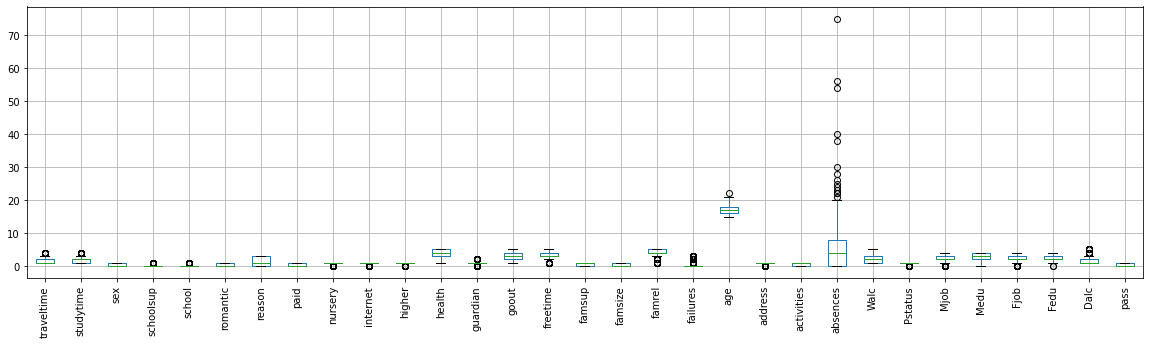

In [486]:
df.boxplot( rot = 90, figsize=(20,5))

<AxesSubplot:>

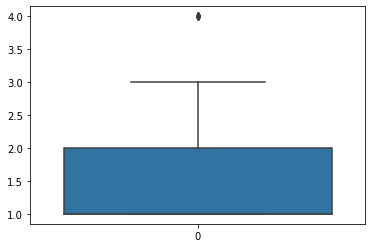

In [487]:
sns.boxplot(df['traveltime'])

<AxesSubplot:>

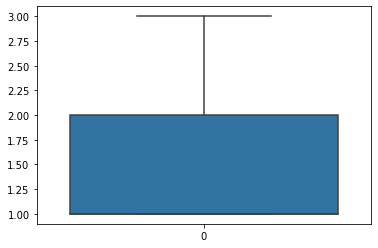

In [488]:
df=df[df['traveltime']<4.0]
sns.boxplot(df['traveltime'])

<AxesSubplot:>

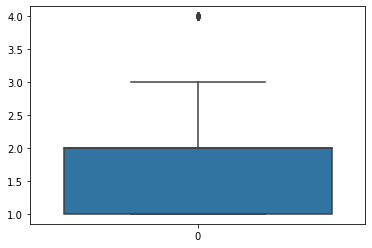

In [489]:
sns.boxplot(df['studytime'])

<AxesSubplot:>

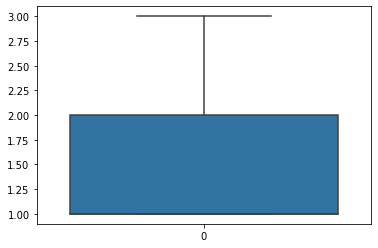

In [490]:
df=df[df['studytime']<4.0]
sns.boxplot(df['traveltime'])

<AxesSubplot:>

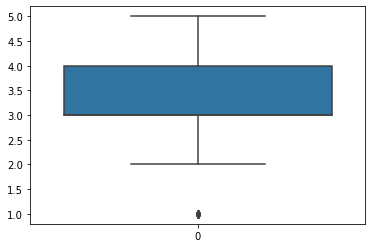

In [491]:
sns.boxplot(df['freetime'])

<AxesSubplot:>

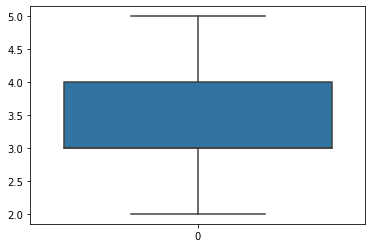

In [492]:
df=df[df['freetime']>1.0]
sns.boxplot(df['freetime'])

<AxesSubplot:>

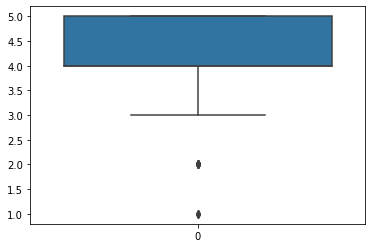

In [493]:
sns.boxplot(df['famrel'])

<AxesSubplot:>

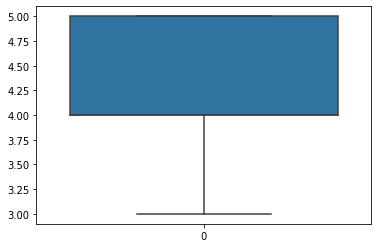

In [494]:
df=df[df['famrel']>2.0]
sns.boxplot(df['famrel'])

<AxesSubplot:>

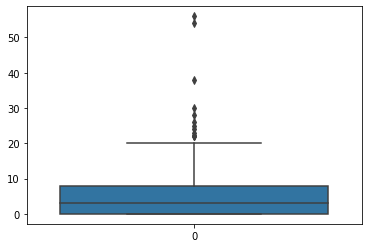

In [495]:
sns.boxplot(df['absences'])

<AxesSubplot:>

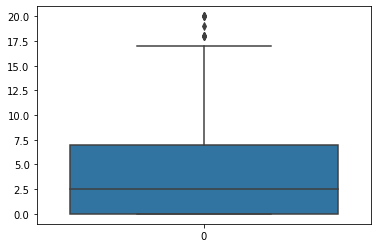

In [496]:
df=df[df['absences']<21]
sns.boxplot(df['absences'])

In [497]:
df.shape

(312, 31)

In [498]:
#df=df[['studytime', 'sex', 'nursery', 'internet', 'higher', 'freetime', 'famsize', 'address', 'activities','Pstatus', 'Mjob', 'Medu', 'Fjob', 'Fedu','pass']]

In [ ]:
from sklearn.linear_model import Lasso

ls=Lasso(alpha=0.1,normalize=True)
ls.fit(data,labels)

z=ls.coef_
z

In [500]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

traveltime    1.0
studytime     1.0
sex           1.0
schoolsup     0.0
school        0.0
romantic      1.0
reason        2.0
paid          1.0
nursery       0.0
internet      0.0
higher        0.0
health        2.0
guardian      0.0
goout         2.0
freetime      1.0
famsup        1.0
famsize       1.0
famrel        1.0
failures      0.0
age           2.0
address       0.0
activities    1.0
absences      7.0
Walc          2.0
Pstatus       0.0
Mjob          1.0
Medu          2.0
Fjob          1.0
Fedu          2.0
Dalc          1.0
pass          1.0
dtype: float64

In [501]:
#show outlier data
Upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

     traveltime  studytime    sex  schoolsup  school  romantic  reason   paid  \
0         False      False  False       True   False     False   False  False   
1         False      False  False      False   False     False   False  False   
2         False      False  False       True   False     False   False  False   
3         False      False  False      False   False     False   False  False   
4         False      False  False      False   False     False   False  False   
..          ...        ...    ...        ...     ...       ...     ...    ...   
388       False      False  False      False    True     False   False  False   
390       False      False  False      False    True     False   False  False   
392       False      False  False      False    True     False   False  False   
393       False      False  False      False    True     False   False  False   
394       False      False  False      False    True     False   False  False   

     nursery  internet  ...

In [502]:
# remove outlier
#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.shape

In [503]:
from sklearn.preprocessing import scale,StandardScaler,normalize,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

ardata=normalize(df,norm='l2',axis=0)
ardata = StandardScaler().fit(ardata).transform(ardata)
ardata=MinMaxScaler(feature_range=(0,1)).fit_transform(ardata)
DFdata=pd.DataFrame(ardata,columns=df.columns)
labels = DFdata['pass']
data=DFdata.drop('pass',axis=1)
labels = label_encoder.fit_transform(labels) 

In [504]:
X = data  
y = labels

In [505]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

selectkBest = SelectKBest(chi2, k=15)
X_new = selectkBest.fit_transform(X, y)
cols_idxs = selectkBest.get_support(indices=True)
features_df_new = X.iloc[:,cols_idxs]
data=features_df_new

X = data  
y = labels

In [506]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(249, 15)
(63, 15)
(249,)
(63,)


In [507]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [508]:
from sklearn.feature_selection import RFE

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

#from sklearn.linear_model import LogisticRegression
tree=DecisionTreeClassifier()
rfe = RFE(tree,n_features_to_select=9, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
tree.fit(X_train_rfe,y_train)
y_predict=tree.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.9959839357429718 
 MAE  =0.004016064257028112 
 confusion_matrix=
[[140   0]
 [  1 108]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       140
           1       1.00      0.99      1.00       109

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



In [542]:
from sklearn.linear_model import LogisticRegression

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
lr=LogisticRegression(C=0.9, solver='liblinear')
rfe = RFE(lr,n_features_to_select=9, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
lr.fit(X_train_rfe,y_train)
y_predict=lr.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.7068273092369478 
 MAE  =0.2931726907630522 
 confusion_matrix=
[[102  38]
 [ 35  74]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       140
           1       0.66      0.68      0.67       109

    accuracy                           0.71       249
   macro avg       0.70      0.70      0.70       249
weighted avg       0.71      0.71      0.71       249



In [529]:
from sklearn.feature_selection import RFE
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

knn=KNeighborsClassifier(n_neighbors=84)
knn.fit(X_train,y_train) 

rfe = RFE(nb,n_features_to_select=15, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
knn.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.8232931726907631 
 MAE  =0.17670682730923695 
 confusion_matrix=
[[120  20]
 [ 24  85]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       140
           1       0.81      0.78      0.79       109

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



In [536]:
from sklearn.feature_selection import RFE
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

nb = svm.SVC(kernel='rbf')
nb.fit(X_train, y_train) 

rfe = RFE(nb,n_features_to_select=15, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
nb.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.8232931726907631 
 MAE  =0.17670682730923695 
 confusion_matrix=
[[120  20]
 [ 24  85]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       140
           1       0.81      0.78      0.79       109

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



In [526]:
from sklearn.feature_selection import RFE
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

classifier = GaussianNB() 

rfe = RFE(classifier,n_features_to_select=15, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
classifier.fit(X_train_rfe,y_train)
y_predict=classifier.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.6345381526104418 
 MAE  =0.3654618473895582 
 confusion_matrix=
[[71 69]
 [22 87]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.76      0.51      0.61       140
           1       0.56      0.80      0.66       109

    accuracy                           0.63       249
   macro avg       0.66      0.65      0.63       249
weighted avg       0.67      0.63      0.63       249



In [527]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,100):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    Result=model.score(X_test,y_test)
    print(f"neighbors : {i} , score : {Result}")

neighbors : 1 , score : 0.5714285714285714
neighbors : 2 , score : 0.6825396825396826
neighbors : 3 , score : 0.6507936507936508
neighbors : 4 , score : 0.6031746031746031
neighbors : 5 , score : 0.6190476190476191
neighbors : 6 , score : 0.6190476190476191
neighbors : 7 , score : 0.6349206349206349
neighbors : 8 , score : 0.6825396825396826
neighbors : 9 , score : 0.6666666666666666
neighbors : 10 , score : 0.6507936507936508
neighbors : 11 , score : 0.6666666666666666
neighbors : 12 , score : 0.6507936507936508
neighbors : 13 , score : 0.6349206349206349
neighbors : 14 , score : 0.6507936507936508
neighbors : 15 , score : 0.6507936507936508
neighbors : 16 , score : 0.6666666666666666
neighbors : 17 , score : 0.6349206349206349
neighbors : 18 , score : 0.6666666666666666
neighbors : 19 , score : 0.6666666666666666
neighbors : 20 , score : 0.6984126984126984
neighbors : 21 , score : 0.6349206349206349
neighbors : 22 , score : 0.6825396825396826
neighbors : 23 , score : 0.66666666666666

The accuracy of KNN is:  0.7
[[28 12]
 [ 7 16]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        40
           1       0.57      0.70      0.63        23

    accuracy                           0.70        63
   macro avg       0.69      0.70      0.69        63
weighted avg       0.72      0.70      0.70        63



<AxesSubplot:>

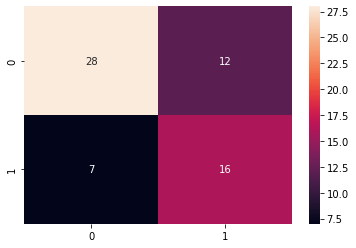

In [530]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=85)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
#print('y_predict={} \n y_test  ={}'.format(y_pred,y_test))
ac = accuracy_score(y_test,y_pred)
print('The accuracy of KNN is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
sns.heatmap(cm,annot=True)

In [531]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,20):
    classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state=4)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ac=metrics.accuracy_score(y_test, y_pred)
    print('The accuracy of Decision Tree Classification is: ', round(ac,2),'i=',i)

The accuracy of Decision Tree Classification is:  0.51 i= 1
The accuracy of Decision Tree Classification is:  0.57 i= 2
The accuracy of Decision Tree Classification is:  0.6 i= 3
The accuracy of Decision Tree Classification is:  0.56 i= 4
The accuracy of Decision Tree Classification is:  0.63 i= 5
The accuracy of Decision Tree Classification is:  0.52 i= 6
The accuracy of Decision Tree Classification is:  0.52 i= 7
The accuracy of Decision Tree Classification is:  0.52 i= 8
The accuracy of Decision Tree Classification is:  0.65 i= 9
The accuracy of Decision Tree Classification is:  0.62 i= 10
The accuracy of Decision Tree Classification is:  0.6 i= 11
The accuracy of Decision Tree Classification is:  0.57 i= 12
The accuracy of Decision Tree Classification is:  0.57 i= 13
The accuracy of Decision Tree Classification is:  0.52 i= 14
The accuracy of Decision Tree Classification is:  0.52 i= 15
The accuracy of Decision Tree Classification is:  0.52 i= 16
The accuracy of Decision Tree Class

The accuracy of Decision Tree Classification is:  0.63
[[32  8]
 [15  8]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        40
           1       0.50      0.35      0.41        23

    accuracy                           0.63        63
   macro avg       0.59      0.57      0.57        63
weighted avg       0.61      0.63      0.62        63



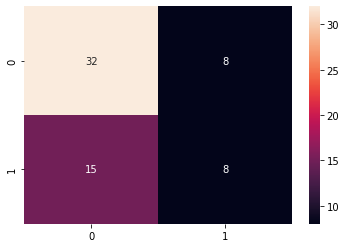

In [532]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Decision Tree Classification is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Logistic Regression is:  0.67
[[30 10]
 [11 12]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        40
           1       0.55      0.52      0.53        23

    accuracy                           0.67        63
   macro avg       0.64      0.64      0.64        63
weighted avg       0.66      0.67      0.67        63



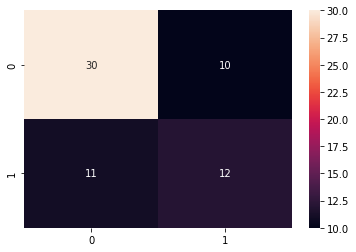

In [533]:
# Classification LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Logistic Regression is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Accuracy of the SVM Model:  0.67
[[33  7]
 [14  9]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        40
           1       0.56      0.39      0.46        23

    accuracy                           0.67        63
   macro avg       0.63      0.61      0.61        63
weighted avg       0.65      0.67      0.65        63



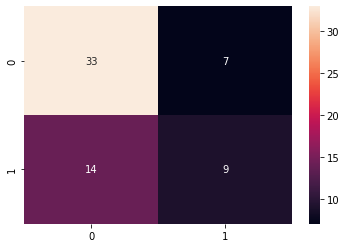

In [534]:
# Classification SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM Model: ",round(accuracy,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Naive bayes is:  0.6031746031746031
[[20 20]
 [ 5 18]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62        40
           1       0.47      0.78      0.59        23

    accuracy                           0.60        63
   macro avg       0.64      0.64      0.60        63
weighted avg       0.68      0.60      0.61        63



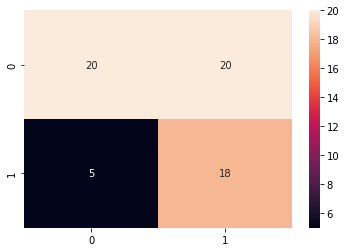

In [535]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('The accuracy of Naive bayes is: ', ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))